# Example of extraction of result on a plane

This is an example of how to extract horizontal slices from a TELEMAC-3D result file.
The 1st one is the extraction for one specific number of level.

data= [2.445678   2.44913173 2.44947815 ... 2.44545579 2.44835949 2.44835949]


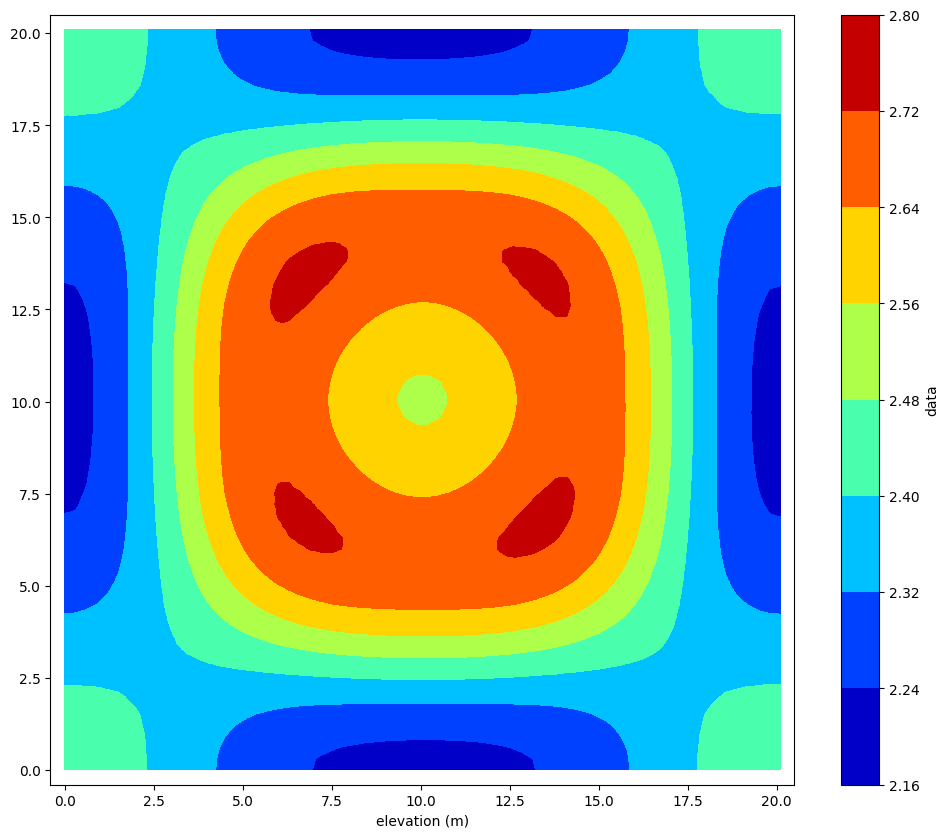

In [1]:
from os import environ, path
from data_manip.extraction.telemac_file import TelemacFile
import matplotlib.pyplot as plt
from postel.plot2d import plot2d_scalar_filled_contour, plot2d_triangle_mesh, plot2d_vectors
import numpy as np

# File we are going to use
file_name = path.join(environ['HOMETEL'], 
                      'notebooks', 
                      'data',
                      'r3d_gouttedo.slf')

# Opening the file with TelemacFile
res = TelemacFile(file_name)

#Number of time step and number of plane for the horizontal slice
record = 10
# Be careful the numbering of planes is from zero to nplan-1
num_plane = 2

data = res.get_data_on_horizontal_plane('ELEVATION Z', record, num_plane)

print('data=', data)

# Initialising matplotlib figure
fig, axes = plt.subplots(figsize=(12, 10))

# Plot mesh
plot2d_triangle_mesh(axes, res.tri, color='k', linewidth=0.1)
    
# Plotting scalar map
plot2d_scalar_filled_contour(fig, axes, res.tri, data, 'elevation (m)')

# Showing the plot
plt.show()

# Closing file
res.close()

# Example of extraction of result on a horizontal slice

This is an example of how to extract horizontal slices from a TELEMAC-3D result file.

data= [[ 7.23348475e-17  2.20075187e-16]
 [-3.80743341e-02 -4.48856938e-02]
 [-5.39848409e-07 -3.97516506e-07]
 ...
 [-3.42990144e-02 -4.10772833e-02]
 [-3.83003897e-02 -4.32390583e-02]
 [ 3.82982866e-02  4.32370598e-02]]


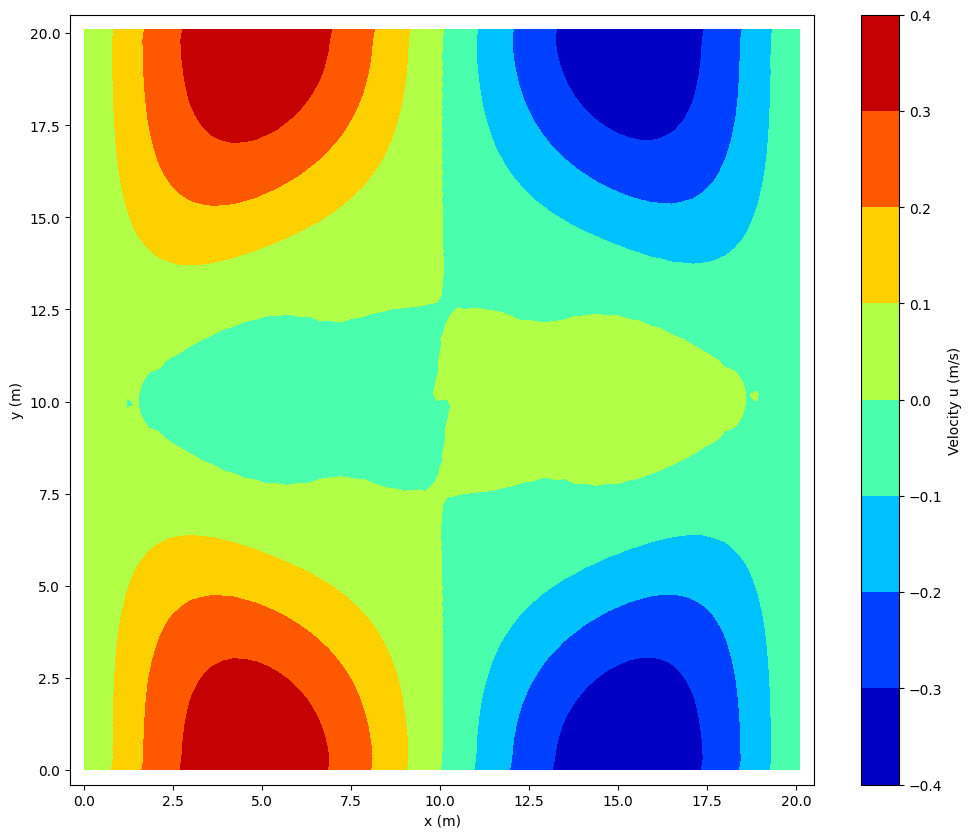

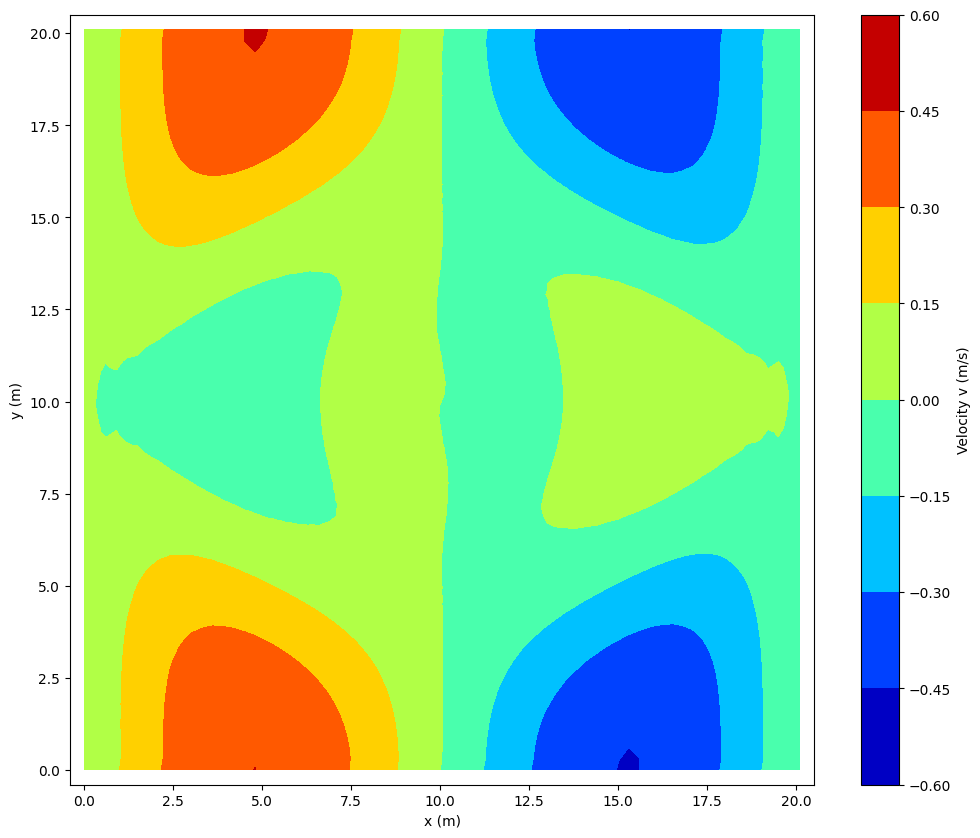

In [2]:
from os import environ, path
from data_manip.extraction.telemac_file import TelemacFile
import matplotlib.pyplot as plt
from postel.plot2d import plot2d_scalar_map, plot2d_triangle_mesh
import numpy as np

# File we are going to use
file_name = path.join(environ['HOMETEL'], 
                      'notebooks', 
                      'data',
                      'r3d_gouttedo.slf')

# Opening the file with TelemacFile
res = TelemacFile(file_name)

#elevation of the desired slice z = 1 m
Zslice = [0.5, 2.0]

# time step of the desired slice
record=10

#slice of the field 'velocity u' at the initial time step
coupe_hori = res.get_data_on_horizontal_slice('VELOCITY U', record, Zslice)

print('data=', coupe_hori)

# Initialising matplotlib figure
fig, axes = plt.subplots(figsize=(12, 10))
    
# Plotting scalar map
plot2d_scalar_filled_contour(fig, axes, res.tri, coupe_hori[:, 0], data_name='Velocity u (m/s)', x_label="x (m)", y_label="y (m)")
# Showing the plot

# Initialising matplotlib figure
fig, axes = plt.subplots(figsize=(12, 10))
    
# Plotting scalar map
plot2d_scalar_filled_contour(fig, axes, res.tri, coupe_hori[:, 1], data_name='Velocity v (m/s)', x_label="x (m)", y_label="y (m)")

# Showing the plot
plt.show()

# Closing file
res.close()

# Example of vertical extraction along a polyline

This is an example of how to extract vertical slice from a TELEMAC-3D result file.
The 1st one is the extraction for one polyline.

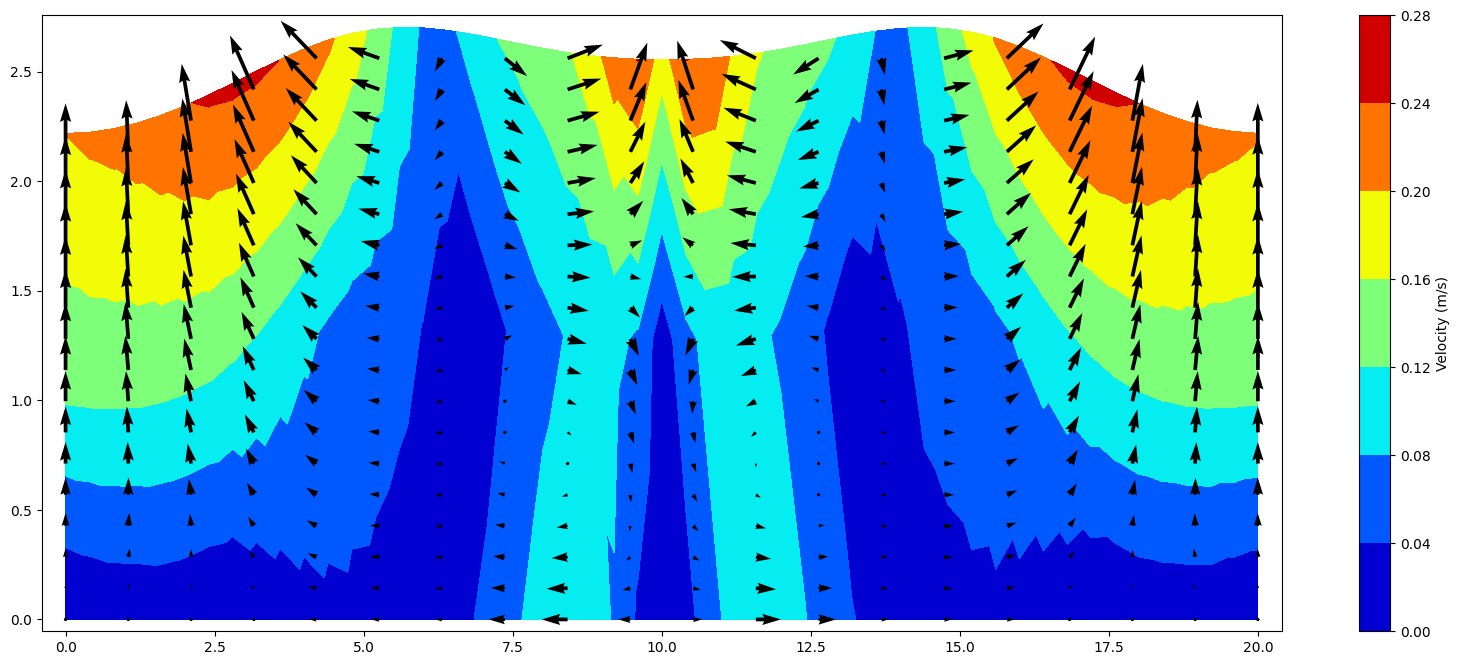

In [3]:
from os import environ, path
from data_manip.extraction.telemac_file import TelemacFile
from data_manip.computation.triangulation import triangulation_from_data
import matplotlib.pyplot as plt
from postel.plot2d import plot2d_scalar_map, plot2d_triangle_mesh
from postel.plot_vnv import *
import numpy as np

# File we are going to use
file_name = path.join(environ['HOMETEL'], 
                      'notebooks', 
                      'data',
                      'r3d_gouttedo.slf')

# Opening the file with TelemacFile
res = TelemacFile(file_name)

# points defining the polyline
poly_points = [[0.0, 10.0], [20.0, 10.0]]

# number of points per segment of the polyline
poly_number=[50]

# slice at initial time step (0) of the elevation variable
_, abs_curv, values_poly_Z=\
    res.get_data_on_vertical_plane('ELEVATION Z', 10, poly_points, poly_number)

# slice at initial time step (0) of the velocity u variable
_, _, velx= res.get_data_on_vertical_plane('VELOCITY U', 10, poly_points, poly_number)
_, _, velz= res.get_data_on_vertical_plane('VELOCITY W', 10, poly_points, poly_number)

# creation of a mesh from the elevation value and curvilinear coordinate of the polyline
mesh = triangulation_from_data(abs_curv, values_poly_Z)

# plot of the vertical slice
fig, axes = plt.subplots(figsize=(20, 8))
plot2d_triangle_mesh(axes, mesh, color='k', linewidth=0.1)

# be careful the value extracted from polyline over each plane must be a vector and not a matrix
velocity = np.sqrt(velx.flatten()**2 + velz.flatten()**2)
plot2d_scalar_filled_contour(fig, axes, mesh, velocity, data_name='Velocity (m/s)',
                             x_label="Distance (m)", y_label="Z (m)")

plot2d_vectors(fig, axes, mesh, velx.flatten(), velz.flatten(), normalize=False,
               grid_resolution=[20, 20], scale=5, color='k')

# Showing the plot
plt.show()

# Closing file
res.close()

# Example of  extraction on vertical segment over time

This is an example of how to extract a time serie of vertical segment from a TELEMAC-3D result file.

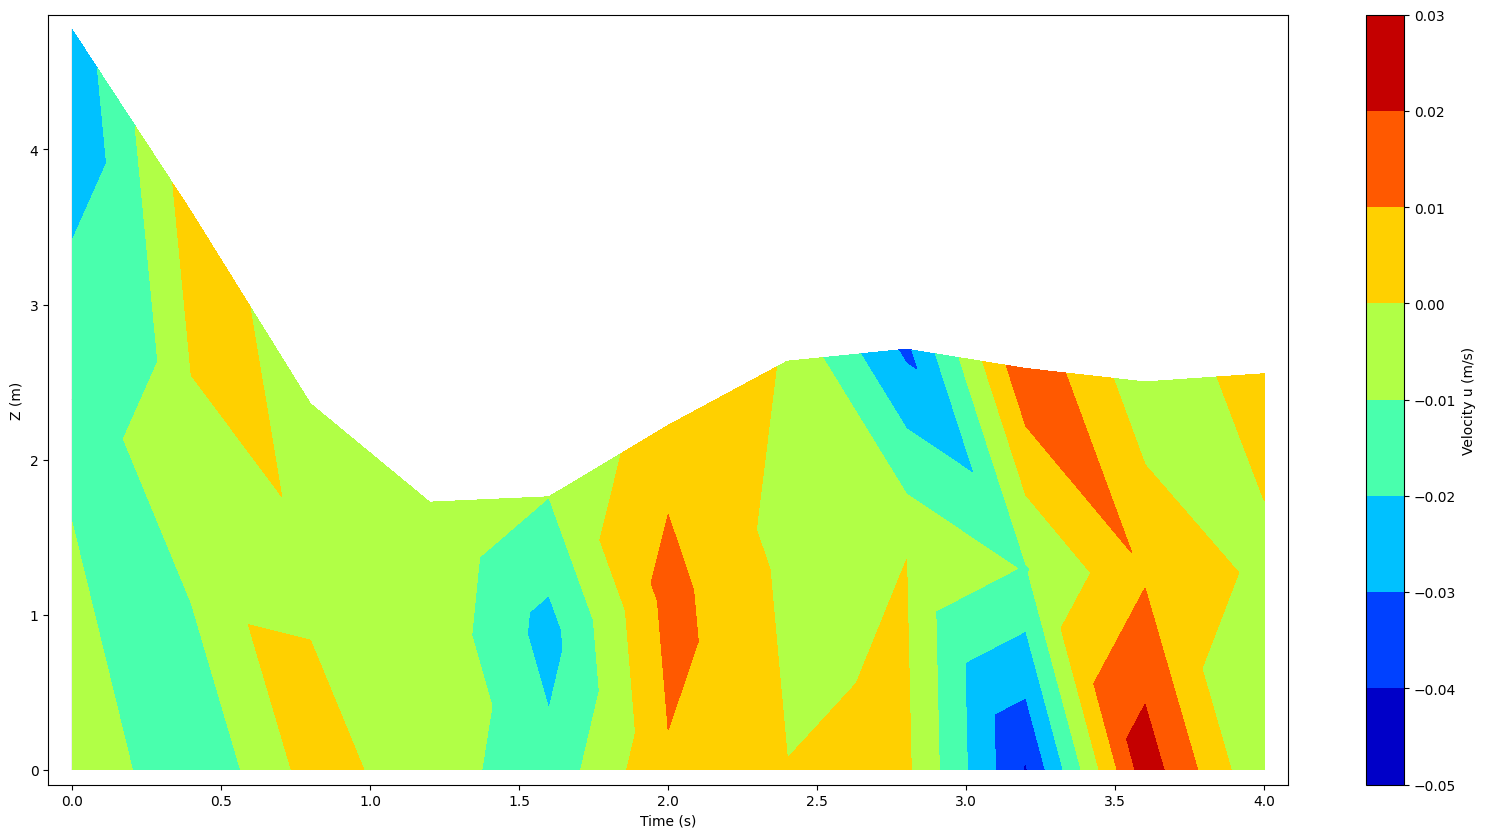

In [4]:
from os import environ, path
from data_manip.extraction.telemac_file import TelemacFile
import matplotlib.pyplot as plt
from postel.plot2d import plot2d_scalar_map, plot2d_triangle_mesh
import numpy as np
from data_manip.computation.triangulation import triangulation_from_data

# File we are going to use
file_name = path.join(environ['HOMETEL'], 
                      'notebooks', 
                      'data',
                      'r3d_gouttedo.slf')

# Opening the file with TelemacFile
res = TelemacFile(file_name)

# 2d point where you want the vertical extraction
points_to_extract=np.array([10.0,10.0])

# time serie extraction of elevation variable
timeseries_Z = \
res.get_timeseries_on_vertical_segment('ELEVATION Z', points_to_extract)

# time serie extraction of elevation variable
timeseries_vel = \
res.get_timeseries_on_vertical_segment('VELOCITY U', points_to_extract)

# creation of a mesh from the elevation value and curvilinear coordinate of the polyline
mesh = triangulation_from_data(res.times,timeseries_Z.T)

# plot of the time serie extraction
fig, axes = plt.subplots(figsize=(20, 10))
plot2d_triangle_mesh(axes, mesh, color='k', linewidth=0.1)

# be careful the value extracted from polyline over each plane must be a vector and not a matrix
plot2d_scalar_filled_contour(fig, axes, mesh, timeseries_vel.flatten(), data_name='Velocity u (m/s)', x_label='Time (s)', y_label='Z (m)')

# Showing the plot
plt.show()

# Closing file
res.close()